<a href="https://colab.research.google.com/github/rahulgupta743/Enhance-the-dark/blob/main/latest_CW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn.cluster as cluster
import seaborn as sns
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


In [3]:
data =  np.load('cluster_data.npy')

In [4]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

SCATTER THE DATA

In [5]:
data.shape

(2309, 2)

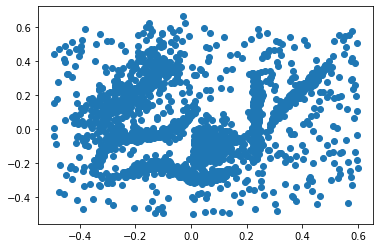

In [6]:
plt.scatter(data[:,0],data[:,1] )

In [37]:
def plot_clusters(data, algorithm):
  start_time = time.time()
  labels = algorithm.fit_predict(data)
  end_time = time.time()
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
 # plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
  plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time))

NORMALIZING THE DATA


In [44]:
from sklearn.preprocessing import StandardScaler

def data_standardizer(data):
  scaler = StandardScaler().fit(data)
  standard_data = StandardScaler().fit_transform(data)
  return standard_data



In [45]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [46]:
data_standardizer(data)

array([[-0.58346832, -1.06394745],
       [-1.00728462, -1.16906299],
       [ 0.47152727, -1.26038955],
       ...,
       [ 2.07691527, -1.38057722],
       [ 2.22951664,  0.80790425],
       [-0.4357489 , -0.97767169]])

ELBOW METHOD FOR KMEANS

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

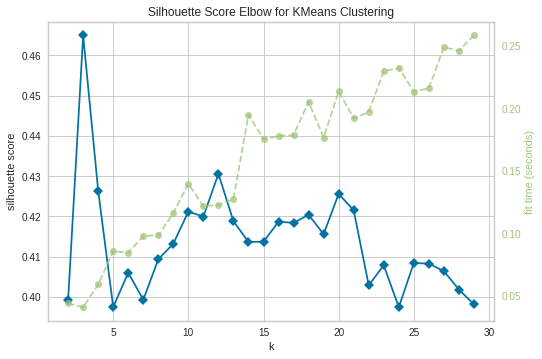

Optimal number of clusters based on silhouette score: [3]


In [62]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data_standardizer(data))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df['scores'] = visualizer.k_scores_
df1 = df[df.scores == df.scores.max()]
print('Optimal number of clusters based on silhouette score:', df1['centers'].tolist())

In [20]:
# from sklearn.cluster import KMeans
# inertia_values = [] 
# for i in range(1, 10): 
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(data) 
#     inertia_values.append(kmeans.inertia_)


In [21]:
# inertia_values

[244.86495201459024,
 150.3137573471294,
 85.10289788476044,
 61.42481565730522,
 51.59595717005991,
 43.133244289727,
 36.56390248054564,
 31.336711778248606,
 27.584143078305484]

now we are plotting the cluster values with their inertia

Text(0, 0.5, 'inertia values')

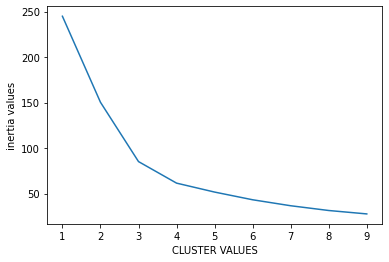

In [22]:
# plt.plot(range(1,10) , inertia_values)
# plt.xlabel("CLUSTER VALUES")
# plt.ylabel("inertia values")

from this elbow chart , we can say that the optimal value for number of cluster is 4

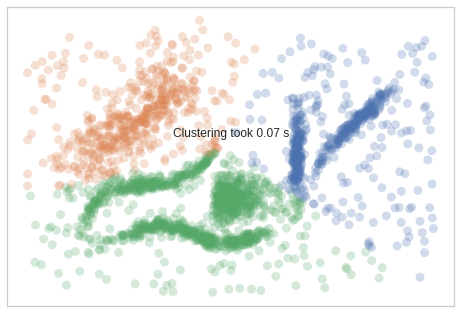

In [63]:

from sklearn.cluster import KMeans
import time
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42 )
plot_clusters(data_standardizer(data) , kmeans)
# ,() , {'n_clusters': 4, 'init':'k-means++', 'n_init':10, 'max_iter':300, 'tol':0.0001, 'verbose':0}) 

In [51]:
def get_pref_range(similarity):
    starting_point = np.median(similarity)

    if starting_point == 0:
        starting_point = np.mean(similarity)

    # Let's try to accelerate the pace of values picking
    if starting_point >= 0.05:
      step =1
    else:
      step = 2

    preference_tuning_range = [starting_point]
    max_val = starting_point
    while max_val < 1:
        max_val *= 1.25 if max_val > 0.1 and step == 2 else step

    preference_tuning_range.append(max_val)

    min_val = starting_point
    if starting_point >= 0.05:
        while min_val > 0.01:
            min_val /= step
            preference_tuning_range.append(min_val)

    return preference_tuning_range

In [52]:
get_pref_range(data_standardizer(data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,


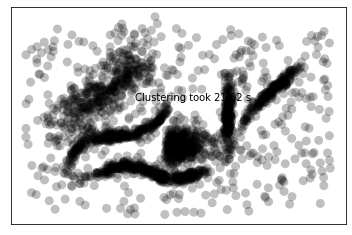

In [48]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
Affinity_clustering = AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='precomputed')
plot_clusters(data_standardizer(data) , Affinity_clustering)


MEAN SHIFT ALGORITHM FOR CLUSTERING

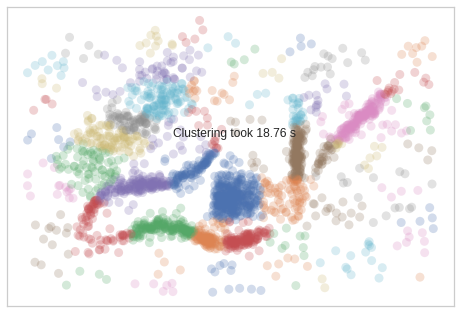

In [66]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.3, n_samples=100)
MS =  MeanShift(bandwidth=bandwidth)
plot_clusters(data_standardizer(data) , MS)
#cluster_centers = MS.cluster_centers_

Agglomerative clustering

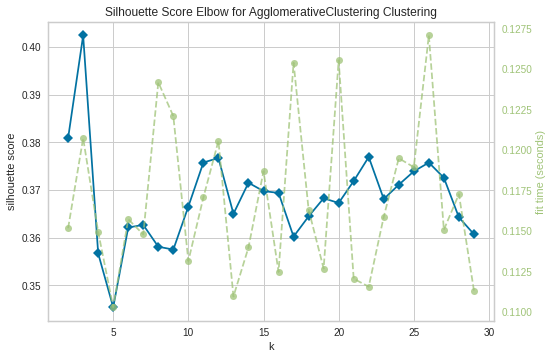

Optimal number of clusters based on silhouette score: [3]


In [71]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data_standardizer(data))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

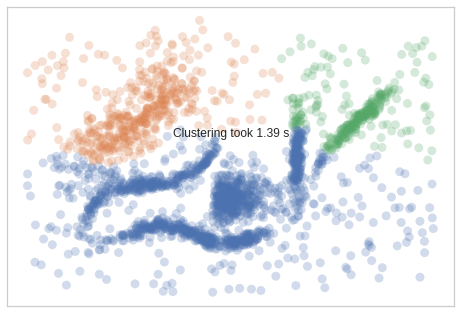

In [61]:
from sklearn.cluster import AgglomerativeClustering

AGC = AgglomerativeClustering(n_clusters = 3, affinity='euclidean')

plot_clusters(data_standardizer(data) , AGC)


In [72]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_standardizer(data))
distances, indices = neighbors.kneighbors(data_standardizer(data))
distances = np.sort(distances[:,10], axis=0)




In [75]:
i = np.arange(len(distances))


In [77]:
i

array([   0,    1,    2, ..., 2306, 2307, 2308])

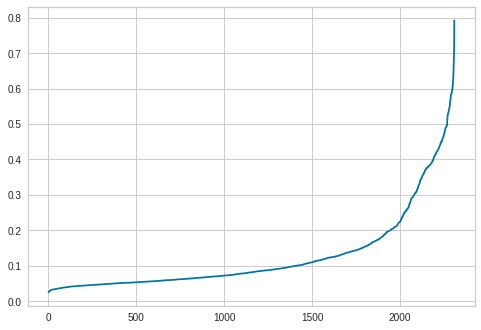

In [76]:
plt.plot(i , distances)


In [81]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.2)


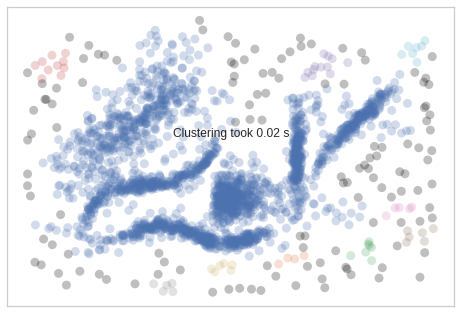

In [82]:
plot_clusters(data_standardizer(data) , dbscan)
